### Imports
Load libraries for data handling, preprocessing, model building, training, plotting, and evaluation.


In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, TimeDistributed, Activation,LSTM,Bidirectional

### Load dataset and split
Read data, create `(word, lemma)` pairs, and split into train/test.


In [5]:
# Read data from CSV file (assuming 'word' and 'lemma' columns)
df = pd.read_csv('shuffled_dataset.csv')

word_to_lemma = list(zip(df['Word'], df['Lemma']))

print(word_to_lemma)

train_set, test_set = train_test_split(word_to_lemma,
                                       test_size=0.2)
print(len(train_set), len(test_set))

[('علمبرداردے', 'علمبردار'), ('چکھوادی', 'چکھوا'), ('چھیڑواوئیے', 'چھیڑوا'), ('نپاندی', 'نپا'), ('پشاوریتو', 'پشاوریت'), ('پھُلوائے', 'پھُلوا'), ('تُرواون', 'تُروا'), ('جرجراتا', 'جرجرا'), ('گھمواوندا', 'گھموا'), ('قومیئیے', 'قومی'), ('سنبھالے', 'سنبھال'), ('سرسرین', 'سرسری'), ('تقریبی', 'تقریب'), ('چکی', 'چکی'), ('اذیتو', 'اذیت'), ('جھجکتیں', 'جھجک'), ('ڈونگے', 'ڈونگا'), ('طرفگی', 'طرفہ'), ('فرنیچرو', 'فرنیچر'), ('کھجھائیں', 'کھجھا'), ('وجائیں', 'وجا'), ('تحققیں', 'تحقق'), ('ٹیکسٹائلے', 'ٹیکسٹائل'), ('تھمی', 'تھم'), ('دوہراؤں', 'دوہرا'), ('بلھنی', 'بلھ'), ('ثورانو', 'ثوران'), ('پرتالیو', 'پرتال'), ('مہنا', 'مہنا'), ('اعفا', 'اعفا'), ('عدالتی', 'عدالت'), ('منٹو', 'منٹ'), ('ڈائریکٹریاں', 'ڈائریکٹر'), ('دندنی', 'دندن'), ('تنہانی', 'تنہا'), ('نندھتیں', 'نندھ'), ('سوچاندے', 'سوچا'), ('جھڑایو', 'جھڑا'), ('حاملہوے', 'حاملہ'), ('ٹبوک', 'ٹبوک'), ('اُداساں', 'اُداس'), ('سنبلتی', 'سنبل'), ('پگھلون', 'پگھل'), ('رہائشو', 'رہائش'), ('اثم', 'اثم'), ('لکیوائیں', 'لکیوا'), ('سفارتکارو', 'سفارتکار'), (

### Prepare training lists
Split the training set into `words` (inputs) and `lemmas` (targets).


In [6]:
words = [n for (n, l) in train_set] ## X
lemmas = [l for (n, l) in train_set] ## y

### Fit character-level tokenizer
Train a character-level tokenizer on both words and lemmas.


In [7]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(words)
tokenizer.fit_on_texts(lemmas)

### Vocabulary size
Compute total unique characters in the corpus (words + lemmas).


In [8]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 54


In [ ]:
tokenizer.word_index

{'ا': 1,
 'و': 2,
 'ی': 3,
 'ن': 4,
 'ر': 5,
 'ک': 6,
 'ل': 7,
 'ھ': 8,
 'ت': 9,
 'د': 10,
 'م': 11,
 'س': 12,
 'ب': 13,
 'ں': 14,
 'پ': 15,
 'ٹ': 16,
 'چ': 17,
 'گ': 18,
 'ج': 19,
 'ہ': 20,
 'ے': 21,
 'ڑ': 22,
 'ئ': 23,
 'ڈ': 24,
 'ش': 25,
 'ف': 26,
 'ق': 27,
 'ُ': 28,
 'خ': 29,
 'ح': 30,
 'ع': 31,
 'ز': 32,
 'ص': 33,
 'ط': 34,
 'ِ': 35,
 'آ': 36,
 'ؤ': 37,
 'غ': 38,
 'ض': 39,
 'َ': 40,
 'ٗ': 41,
 'ث': 42,
 'ذ': 43,
 'ظ': 44,
 'ٔ': 45,
 'ً': 46,
 'ء': 47,
 'ٰ': 48,
 'ّ': 49,
 'ژ': 50,
 'ۓ': 51,
 'ؔ': 52,
 'ۃ': 53}

### Convert texts to integer sequences
Transform character texts to integer IDs for words (inputs) and lemmas (targets).


In [ ]:
words_ints = tokenizer.texts_to_sequences(words)
lemmas_ints = tokenizer.texts_to_sequences(lemmas)


In [ ]:
print(words[:5])
print(words_ints[:5])
print(lemmas[:5])
print(lemmas_ints[:5])

['ناشتے', 'رکھئیں', 'گہرا', 'توریں', 'ٹوئڈ']
[[4, 1, 25, 9, 21], [5, 6, 8, 23, 3, 14], [18, 20, 5, 1], [9, 2, 5, 3, 14], [16, 2, 23, 24]]
['ناشتا', 'رکھ', 'گہرا', 'تور', 'ٹوئڈ']
[[4, 1, 25, 9, 1], [5, 6, 8], [18, 20, 5, 1], [9, 2, 5], [16, 2, 23, 24]]


### Length distribution and longest token
Plot distribution of character lengths; show the longest tokenized word.


اسلامآبادیوندیاں


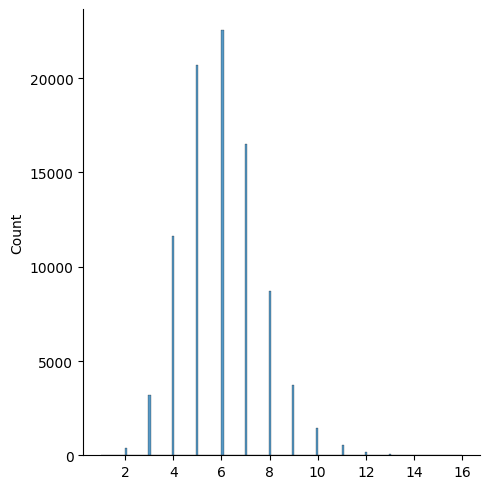

In [ ]:
import seaborn as sns

## We can check the length distribution of texts in corpus

words_lens = [len(n) for n in words_ints]
words_lens

sns.displot(words_lens)
print(words[np.argmax(words_lens)])  # longest name

In [ ]:
max_len = max(len(seq) for seq in words_ints)
print('Maximum Sequence Length:', max_len)

Maximum Sequence Length: 16


### Pad sequences for word amd lemma
Pad integer sequences to the maximum sequence length (`post` padding).


In [ ]:
words_ints_pad = sequence.pad_sequences(words_ints, maxlen=max_len,padding='post')
words_ints_pad[:10]

array([[ 4,  1, 25,  9, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  6,  8, 23,  3, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [18, 20,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  2,  5,  3, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [16,  2, 23, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [20, 22, 13, 22,  1, 23, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4, 19,  8,  2, 16,  3, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [17,  3, 29,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  7, 38,  5,  1, 26,  2, 14,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 26,  5,  3, 27,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],
      dtype=int32)

In [ ]:
lemmas_ints_pad = sequence.pad_sequences(lemmas_ints, maxlen=max_len,padding='post')
lemmas_ints_pad[:10]

array([[ 4,  1, 25,  9,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  6,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [18, 20,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  2,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [16,  2, 23, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [20, 22, 13, 22,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4, 19,  8,  2, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [17,  3, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  7, 38,  5,  1, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 26,  5,  3, 27,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],
      dtype=int32)

### Build model inputs
Convert padded sequences to `int32` NumPy arrays for training.


In [ ]:
X_train = np.array(words_ints_pad).astype('int32')
y_train = np.array(lemmas_ints_pad).astype('int32')

In [ ]:
print(X_train.shape)
print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

(89660, 16)
(89660, 16)


### Binary matrices for words
Create a binary character presence matrix for word texts (optional diagnostic).


In [ ]:
words_matrix = tokenizer.texts_to_matrix(words, mode="binary")
print(words_matrix.shape)

(89660, 54)


In [ ]:
lemmas_matrix = tokenizer.texts_to_matrix(lemmas, mode="binary")
print(lemmas_matrix.shape)

(89660, 54)


In [ ]:
print(words[2])
print(words_matrix[2,:])

گہرا
[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


### Define model
Create an Embedding + Bidirectional LSTM + TimeDistributed Dense (softmax) for sequence-to-sequence character prediction.


In [ ]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(Bidirectional(LSTM(units=64, return_sequences=True))) 
model.add(TimeDistributed(Dense(vocab_size, activation='softmax'))) 

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

### Train BiLSTM lemmatizer


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
561/561 [==============================] - 12s 11ms/step - loss: 0.6671 - accuracy: 0.8597 - val_loss: 0.1218 - val_accuracy: 0.9631
Epoch 2/20
561/561 [==============================] - 5s 9ms/step - loss: 0.1013 - accuracy: 0.9669 - val_loss: 0.0879 - val_accuracy: 0.9704
Epoch 3/20
561/561 [==============================] - 4s 6ms/step - loss: 0.0862 - accuracy: 0.9702 - val_loss: 0.0808 - val_accuracy: 0.9722
Epoch 4/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0806 - accuracy: 0.9720 - val_loss: 0.0772 - val_accuracy: 0.9738
Epoch 5/20
561/561 [==============================] - 4s 7ms/step - loss: 0.0765 - accuracy: 0.9733 - val_loss: 0.0736 - val_accuracy: 0.9745
Epoch 6/20
561/561 [==============================] - 4s 8ms/step - loss: 0.0733 - accuracy: 0.9745 - val_loss: 0.0729 - val_accuracy: 0.9750
Epoch 7/20
561/561 [==============================] - 3s 6ms/step - loss: 0.0703 - accuracy: 0.9758 - val_loss: 0.0674 - val_accuracy: 0.9773
Epoc

### Plot training curves
Visualize training and validation accuracy/loss across epochs.


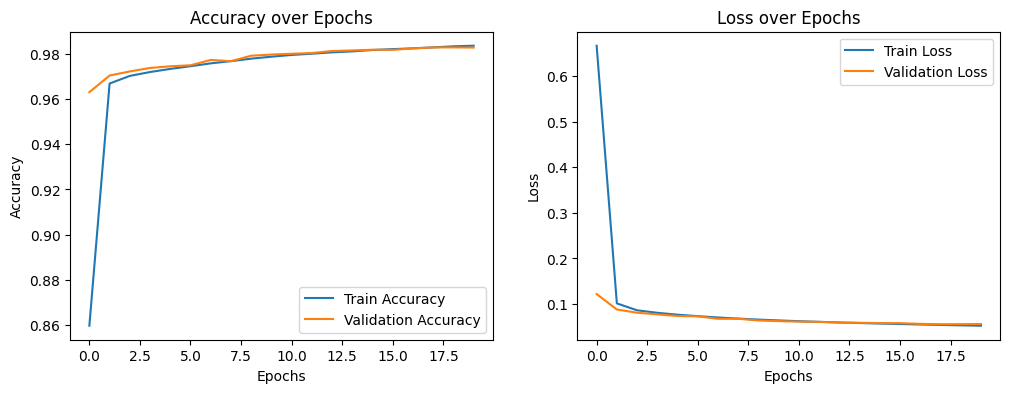

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Prepare testing data
X_test_texts = [n for (n, l) in test_set]
Y_test_texts = [l for (n, l) in test_set]
X_test = np.array(pad_sequences(tokenizer.texts_to_sequences(X_test_texts), maxlen=max_len, padding='post')).astype('int32')
y_test = np.array(pad_sequences(tokenizer.texts_to_sequences(Y_test_texts), maxlen=max_len, padding='post')).astype('int32')

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# Flatten the predictions and true labels for evaluation
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Filter out padding
mask = y_test_flat != 0
y_test_flat = y_test_flat[mask]
y_pred_flat = y_pred_flat[mask]

# Calculate metrics
precision = precision_score(y_test_flat, y_pred_flat, average='macro')
recall = recall_score(y_test_flat, y_pred_flat, average='macro')
f1 = f1_score(y_test_flat, y_pred_flat, average='macro')
accuracy = accuracy_score(y_test_flat, y_pred_flat)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy}')

701/701 [==============================] - 3s 4ms/step
Precision: 0.9499729437701987
Recall: 0.9067796495672906
F1-score: 0.9234471659403748
Accuracy: 0.9603460629458127


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
